In [2]:
from fstack import fstack
from fstack_cu import fstack_cu
import os
import re
import cv2

In [3]:
direct = "../images/1"#input("path to images?")
key = "405"#input("key?")

images = os.listdir(direct)
filteredList = [img for img in images if key in img]
filteredList.sort() # paths must be sorted by z height
paths = [direct + "/" + img for img in filteredList]
focus = [int(re.findall(r"[0-9]+", img)[2]) for img in filteredList]
print(paths)

['../images/1/0_1_0_Fluorescence_405_nm_Ex.bmp', '../images/1/0_1_0_Fluorescence_488_nm_Ex.bmp', '../images/1/0_1_0_Fluorescence_561_nm_Ex.bmp', '../images/1/0_1_0_Fluorescence_638_nm_Ex.bmp', '../images/1/0_1_1_Fluorescence_405_nm_Ex.bmp', '../images/1/0_1_1_Fluorescence_488_nm_Ex.bmp', '../images/1/0_1_1_Fluorescence_561_nm_Ex.bmp', '../images/1/0_1_1_Fluorescence_638_nm_Ex.bmp', '../images/1/0_1_2_Fluorescence_405_nm_Ex.bmp', '../images/1/0_1_2_Fluorescence_488_nm_Ex.bmp', '../images/1/0_1_2_Fluorescence_561_nm_Ex.bmp', '../images/1/0_1_2_Fluorescence_638_nm_Ex.bmp', '../images/1/0_1_3_Fluorescence_405_nm_Ex.bmp', '../images/1/0_1_3_Fluorescence_488_nm_Ex.bmp', '../images/1/0_1_3_Fluorescence_561_nm_Ex.bmp', '../images/1/0_1_3_Fluorescence_638_nm_Ex.bmp', '../images/1/0_1_4_Fluorescence_405_nm_Ex.bmp', '../images/1/0_1_4_Fluorescence_488_nm_Ex.bmp', '../images/1/0_1_4_Fluorescence_561_nm_Ex.bmp', '../images/1/0_1_4_Fluorescence_638_nm_Ex.bmp', '../images/1/0_1_5_Fluorescence_405_nm_

In [4]:
im1 = fstack(paths, focus)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
im2 = fstack_cu(paths, focus)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
FMeasure: 20.87358832359314
SMeasure


TypeError: list indices must be integers or slices, not cupy._core.core.ndarray

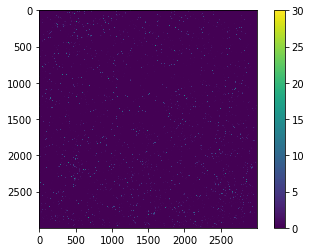

2.5132222222222222
(-24.25836701084121, 38.8253208168286)
26.45676186646746


In [10]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

dif = im2-im1
%matplotlib inline
plt.imshow(np.minimum(np.abs(dif), 30), interpolation='nearest')
plt.colorbar()
plt.show()
print(100*np.sum(np.abs(dif) >= 1)/dif.size)
print((np.min(dif), np.max(dif)))
print(np.mean(np.abs(dif[np.abs(dif)>=1]/im1[np.abs(dif)>=1]) * 100))